In [1]:
from utils import *
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
%store -r data
%store -r target

In [2]:
data = standardize(data)
X_dev, y_dev, X_test, y_test, X_train, y_train, X_val, y_val = split(data,target)

X_train shape: (810, 54)
X_test shape: (100, 54)
X_val shape: (90, 54)


In [3]:
model_rf = RandomForestClassifier()
model_rf.fit(X_dev, y_dev)
predsDevrf = model_rf.predict(X_dev)
predsTestrf = model_rf.predict(X_test)

In [4]:
testrf_score =  accuracy_score(y_test, predsTestrf)
devrf_score = accuracy_score(y_dev, predsDevrf)

In [5]:
print("Classification Score for Random Forest on Dev dataset:\n")
print("Dev Score : ", devrf_score)
print(classification_report(y_dev, predsDevrf))
print("--------------------------------------------------------")
print("Classification Score for Random Forest on Test dataset:\n")
print("Test Score :", testrf_score)
print(classification_report(y_test, predsTestrf))

Classification Score for Random Forest on Dev dataset:

Dev Score :  0.9988888888888889
              precision    recall  f1-score   support

       blues       1.00      1.00      1.00        92
   classical       1.00      1.00      1.00        92
     country       1.00      1.00      1.00        92
       disco       1.00      1.00      1.00        92
      hiphop       1.00      1.00      1.00        93
        jazz       1.00      1.00      1.00        83
       metal       0.99      1.00      0.99        92
         pop       1.00      1.00      1.00        92
      reggae       1.00      1.00      1.00        86
        rock       1.00      0.99      0.99        86

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900

--------------------------------------------------------
Classification Score for Random Forest on Test dataset:

Test Score : 0.77
              precisi

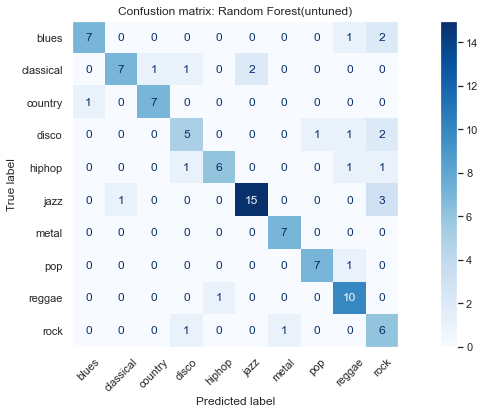

Accuracy : 0.77
Macro F-1 Score : 0.77


In [6]:
# Evaluate Model
class_labels = list(model_rf.classes_)
macro_f1, accuracy = evaluate_model(predsTestrf, y_test, class_labels, 'Confustion matrix: Random Forest(untuned)')
print('Accuracy : %.2f'%accuracy)
print('Macro F-1 Score : %.2f'%macro_f1)

### Tuned

In [7]:
import random
from sklearn.model_selection import GridSearchCV

parameters = {'min_samples_split': np.linspace(10,100,5,dtype=int),
              'n_estimators': np.linspace(50,200,5,dtype=int),
             'bootstrap': [True]}

print(parameters)

{'min_samples_split': array([ 10,  32,  55,  77, 100]), 'n_estimators': array([ 50,  87, 125, 162, 200]), 'bootstrap': [True]}


In [8]:
tune_rf = GridSearchCV(estimator=model_rf,param_grid=parameters,cv=5)
tune_rf.fit(X_dev, y_dev)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True],
                         'min_samples_split': array([ 10,  32,  55,  77, 100]),
                         'n_estimators': array([ 50,  87, 125, 162, 200])})

In [9]:
print("Best Score :", tune_rf.best_score_)
print("Best Parameters :",tune_rf.best_params_)

Best Score : 0.7
Best Parameters : {'bootstrap': True, 'min_samples_split': 10, 'n_estimators': 200}


In [10]:
predsDevrf_tuned = tune_rf.predict(X_dev)
predsTestrf_tuned = tune_rf.predict(X_test)

print("Score on Dev data for RF using GridSearchCV:", accuracy_score(y_dev, predsDevrf_tuned))
print("Score on Test data for RF using GridSearchCV:",accuracy_score(y_test, predsTestrf_tuned))

Score on Dev data for RF using GridSearchCV: 0.9977777777777778
Score on Test data for RF using GridSearchCV: 0.78


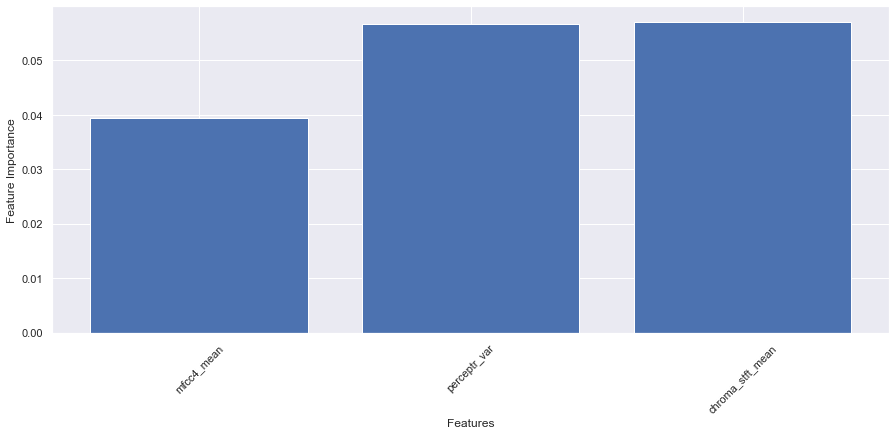

In [11]:
feature_imp_rf = tune_rf.best_estimator_.feature_importances_
final_list_rf = zip(feature_imp_rf,X_dev.columns)
res_rf = sorted(final_list_rf, key = lambda x: x[0])
res_rf = res_rf[-3:]

plt.bar(range(len(res_rf)),[val[0] for val in res_rf],align='center')
plt.xticks(range(len(res_rf)),[val[1] for val in res_rf])
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.show()

### PCA

In [12]:
# Principal Component Analysis 
### cite : https://machinelearningmastery.com/calculate-principal-component-analysis-scratch-python/

# create the PCA instance
pca = PCA(n_components=30)
# fit on data
pca_data = pca.fit_transform(X_dev)
pca_data_test = pca.transform(X_test)
# pca_data_dev = pca.transform(X_dev)
PCA_df= pd.DataFrame(data=pca_data)
y_dev.index = PCA_df.index
pca_final=pd.concat([PCA_df,y_dev], axis = 1)
# access values
print("Explained Variance of each component:",pca.explained_variance_)
print("Sum of Explained Variance:", sum(pca.explained_variance_ratio_))

Explained Variance of each component: [0.27462107 0.16378828 0.106374   0.0723295  0.05484226 0.0387792
 0.02690359 0.02395643 0.02175637 0.01846612 0.01427943 0.01395746
 0.01202789 0.01112264 0.01017838 0.00968102 0.00884281 0.00796848
 0.00769748 0.00724506 0.00710409 0.00655208 0.00600068 0.00568802
 0.00541184 0.00495679 0.00484538 0.0046899  0.00451394 0.00420694]
Sum of Explained Variance: 0.9526388177469115


In [13]:
pca_final.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,label
0,0.000578,-0.630373,-0.054837,0.410234,0.009387,0.027373,-0.032694,-0.147323,0.031382,0.111811,...,0.075848,0.100797,-0.078219,0.036771,-0.009464,-0.018770,0.122165,0.057994,0.035589,classical
1,0.071451,-0.402465,-0.106786,0.332658,-0.060422,0.226589,0.122805,-0.066840,0.069253,-0.088955,...,0.118839,0.092507,-0.016485,0.094386,0.004481,-0.109091,-0.026745,-0.005919,0.000653,jazz
2,-0.047268,0.326820,-0.598692,0.227380,0.045610,0.264122,-0.077908,0.063580,-0.168399,0.038901,...,-0.087541,0.045095,-0.058258,-0.028013,0.014892,0.088475,-0.022387,0.157969,-0.048828,country
3,-0.437642,0.235405,-0.003960,0.029110,-0.170677,-0.094826,-0.142891,0.105729,0.099770,-0.181439,...,0.020383,-0.014250,0.028141,0.054083,0.132980,0.102633,0.085546,0.036392,0.064899,metal
4,-0.849344,0.103658,-0.048105,-0.018132,-0.023246,-0.159358,0.035771,-0.071896,0.111842,0.102861,...,0.040392,-0.010728,0.015863,-0.033035,0.035529,0.012353,-0.043765,-0.010972,0.020453,disco


In [14]:
# from sklearn.preprocessing import OrdinalEncoder
# encoder  = OrdinalEncoder()
# encoder.fit(pca_final.iloc[:,10].reshape(-1, 1))
# y_train_encoded = encoder.transform(pca_final.iloc[:,10])

In [15]:
model_pca = RandomForestClassifier(max_depth=2,n_estimators=1000)
model_pca.fit(pca_final.iloc[:,:30],pca_final.iloc[:,30])
pcaTrainrf = model_pca.predict(pca_data)
pcaTestrf = model_pca.predict(pca_data_test)

In [16]:
pcatestrf_score =  accuracy_score(y_test, pcaTestrf)
pcarf_score = accuracy_score(y_dev, pcaTrainrf)

In [17]:
print("Classification Score for Random Forest on Train dataset:\n")
print("Train Score : ", pcarf_score)
print("--------------------------------------------------------")
print("Classification Score for Random Forest on Test dataset:\n")
print("Test Score :", pcatestrf_score)

Classification Score for Random Forest on Train dataset:

Train Score :  0.6166666666666667
--------------------------------------------------------
Classification Score for Random Forest on Test dataset:

Test Score : 0.44


/Users/riyagupta/miniforge3/envs/tf2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/riyagupta/miniforge3/envs/tf2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/riyagupta/miniforge3/envs/tf2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


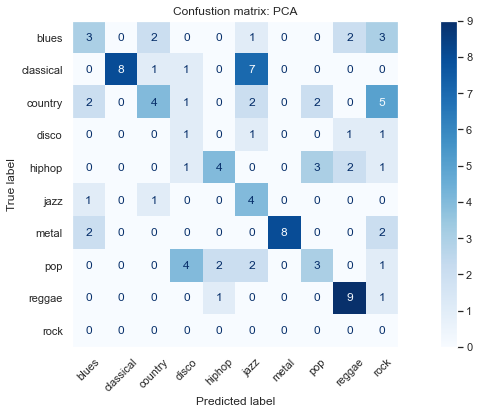

Accuracy : 0.44
Macro F-1 Score : 0.41


In [18]:
# Evaluate Model
class_labels = list(model_rf.classes_)
macro_f1, accuracy = evaluate_model(pcaTestrf, y_test, class_labels, 'Confustion matrix: PCA')
print('Accuracy : %.2f'%accuracy)
print('Macro F-1 Score : %.2f'%macro_f1)

### Tuned PCA model 

In [19]:
pca_final.iloc[:,:30]

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.000578,-0.630373,-0.054837,0.410234,0.009387,0.027373,-0.032694,-0.147323,0.031382,0.111811,...,-0.185600,0.075848,0.100797,-0.078219,0.036771,-0.009464,-0.018770,0.122165,0.057994,0.035589
1,0.071451,-0.402465,-0.106786,0.332658,-0.060422,0.226589,0.122805,-0.066840,0.069253,-0.088955,...,0.120324,0.118839,0.092507,-0.016485,0.094386,0.004481,-0.109091,-0.026745,-0.005919,0.000653
2,-0.047268,0.326820,-0.598692,0.227380,0.045610,0.264122,-0.077908,0.063580,-0.168399,0.038901,...,-0.009258,-0.087541,0.045095,-0.058258,-0.028013,0.014892,0.088475,-0.022387,0.157969,-0.048828
3,-0.437642,0.235405,-0.003960,0.029110,-0.170677,-0.094826,-0.142891,0.105729,0.099770,-0.181439,...,-0.128302,0.020383,-0.014250,0.028141,0.054083,0.132980,0.102633,0.085546,0.036392,0.064899
4,-0.849344,0.103658,-0.048105,-0.018132,-0.023246,-0.159358,0.035771,-0.071896,0.111842,0.102861,...,-0.058895,0.040392,-0.010728,0.015863,-0.033035,0.035529,0.012353,-0.043765,-0.010972,0.020453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,-0.654431,0.218151,0.332880,0.090825,0.133881,-0.215551,0.054108,0.024755,0.233053,-0.024783,...,0.274305,-0.019833,0.089589,-0.034226,-0.045909,-0.005284,-0.086423,-0.002934,-0.000317,0.016364
896,0.515280,-0.634698,0.082394,0.485203,-0.101831,-0.139827,-0.145431,0.177583,0.022336,0.179428,...,0.033444,-0.014828,-0.007807,-0.116088,-0.058312,-0.181779,-0.010788,0.002946,-0.052159,-0.038808
897,0.976786,0.902560,0.595924,0.289104,0.483065,0.202644,0.115368,0.003243,-0.108640,-0.320610,...,0.042428,0.006601,-0.012691,-0.013241,-0.032949,-0.130643,-0.032247,0.000674,0.073927,0.042472
898,0.124804,0.297352,-0.452053,-0.032074,0.037626,0.157139,-0.016187,-0.012220,-0.084180,0.132898,...,0.118318,-0.044751,0.004567,0.031873,0.042797,-0.125769,0.085797,0.038560,0.038071,-0.077859


In [20]:
model_pca_tuned = tune_rf
model_pca_tuned.fit(pca_final.iloc[:,:30],pca_final.iloc[:,30])
pcaTrainrf_tuned = model_pca_tuned.predict(pca_data)
pcaTestrf_tuned = model_pca_tuned.predict(pca_data_test)

In [21]:
pcatestrf_score =  accuracy_score(y_test, pcaTestrf)
pcarf_score = accuracy_score(y_dev, pcaTrainrf)

In [22]:
print("Classification Score for Random Forest on Train dataset:\n")
print("Train Score : ", pcarf_score)
print("--------------------------------------------------------")
print("Classification Score for Random Forest on Test dataset:\n")
print("Test Score :", pcatestrf_score)

Classification Score for Random Forest on Train dataset:

Train Score :  0.6166666666666667
--------------------------------------------------------
Classification Score for Random Forest on Test dataset:

Test Score : 0.44


/Users/riyagupta/miniforge3/envs/tf2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/riyagupta/miniforge3/envs/tf2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/riyagupta/miniforge3/envs/tf2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


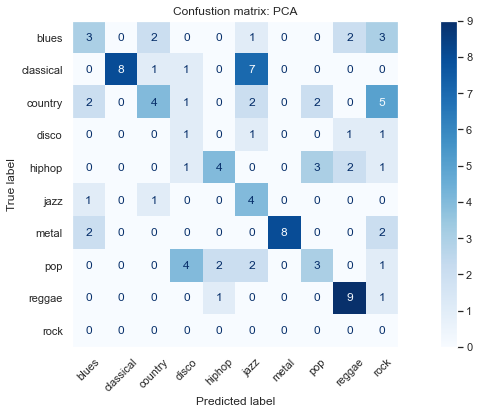

Accuracy : 0.44
Macro F-1 Score : 0.41


In [23]:
# Evaluate Model
class_labels = list(model_rf.classes_)
macro_f1, accuracy = evaluate_model(pcaTestrf, y_test, class_labels, 'Confustion matrix: PCA')
print('Accuracy : %.2f'%accuracy)
print('Macro F-1 Score : %.2f'%macro_f1)

**Ans:** As we see due to the lesser number of data, PCA instead of helping in the improvement of the accuracy or the model learning by reducing the dimensions ("the curse of dimensionality"), makes the model worse. 